<a href="https://colab.research.google.com/github/ivvnn/LE1_Hernandez_IJ/blob/main/LE1_Hernandez_IJ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [51]:
data = pd.read_csv('/content/sample_data/seattle-weather.csv')
data.info()
data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1461 non-null   object 
 1   precipitation  1461 non-null   float64
 2   temp_max       1461 non-null   float64
 3   temp_min       1461 non-null   float64
 4   wind           1461 non-null   float64
 5   weather        1461 non-null   object 
dtypes: float64(4), object(2)
memory usage: 68.6+ KB


(1461, 6)

In [52]:
print(data.columns)
data.head()

Index(['date', 'precipitation', 'temp_max', 'temp_min', 'wind', 'weather'], dtype='object')


,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [83]:
fig = px.box(data['temp_max'], points = 'all')
fig.update_layout(title = f'Distribution of X',title_x=0.5, yaxis_title= "temp_max")
fig.show()

fig = px.box(data['temp_min'], points = 'all')
fig.update_layout(title = f'Distribution of Y',title_x=0.5, yaxis_title= "temp_min")
fig.show()

In [84]:
fig = px.scatter(x = data['temp_max'], y=data['temp_min'])
fig.update_layout(title = 'Weather', title_x=0.5, xaxis_title= "temp_max", yaxis_title="temp_min", height = 500, width = 700)
fig.update_xaxes(showline=True, linewidth=2, linecolor='black', mirror=True)
fig.update_yaxes(showline=True, linewidth=2, linecolor='black', mirror=True)
fig.show()

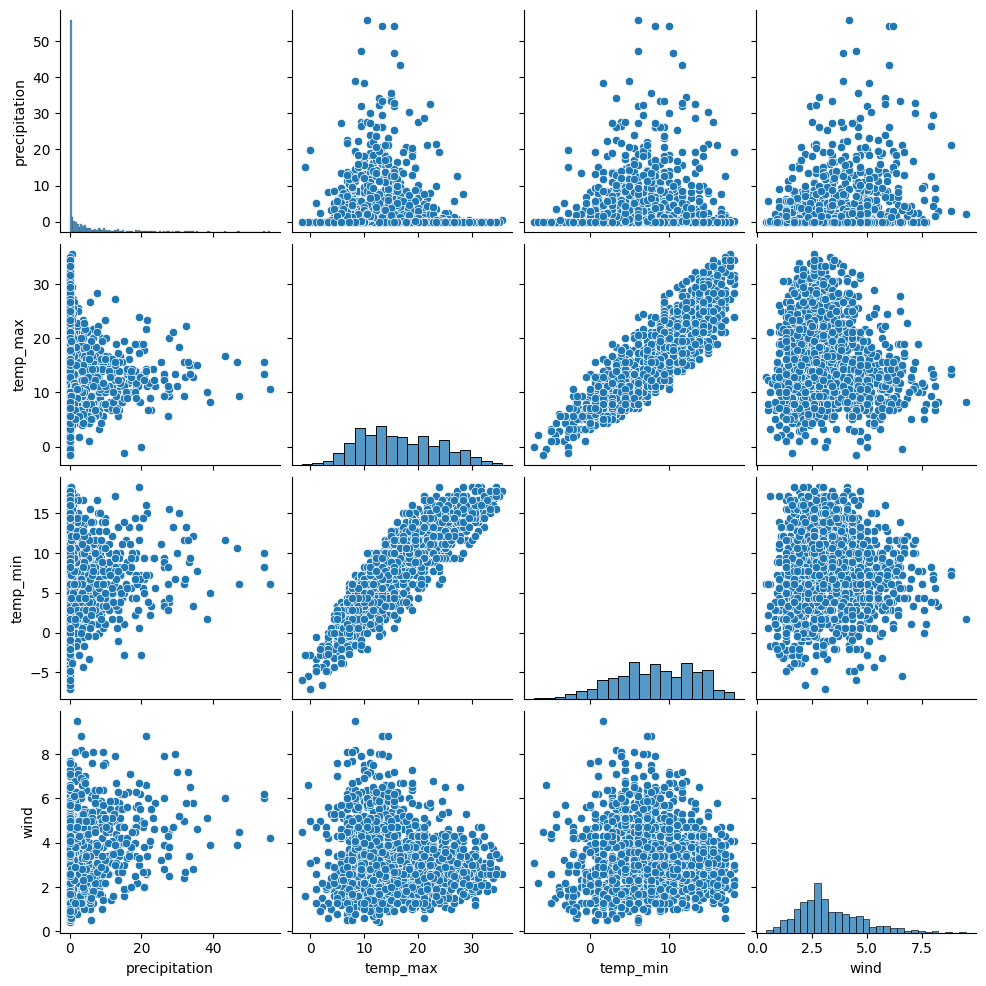

In [53]:
sns.pairplot(data)

In [70]:
X = data.drop('temp_min',axis=1)
y = data['temp_max']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1168, 5)
(293, 5)
(1168,)
(293,)


In [55]:
data['temp_max']

0       12.8
1       10.6
2       11.7
3       12.2
4        8.9
        ... 
1456     4.4
1457     5.0
1458     7.2
1459     5.6
1460     5.6
Name: temp_max, Length: 1461, dtype: float64

In [78]:
# calculate the mean and variance
mean_x = np.mean(data['temp_min'])
mean_y = np.mean(data['temp_max'])

var_x = np.var(data['temp_min'])
var_y = np.var(data['temp_max'])


print('temp_min stats: mean= %.3f   variance= %.3f' % (mean_x, var_x))
print('temp_max stats: mean= %.3f   variance= %.3f' % (mean_y, var_y))

# calculate covariance between x and y
def covariance(x, y):
    mean_x = np.mean(x)
    mean_y = np.mean(y)
    covar = 0.0
    for i in range(len(x)):
        covar += (x[i] - mean_x) * (y[i] - mean_y)
    return covar/len(x)
print()

# estimate coefficients
b1 = covar_xy / var_x
b0 = mean_y - b1 * mean_x

print(f'Coefficents: b0: {b0}  b1: {b1} ')

print()
covar_xy = covariance(data['temp_min'], data['temp_max'])
print(f'Cov(X,Y): {covar_xy}')

temp_min stats: mean= 8.235   variance= 25.213
temp_max stats: mean= 16.439   variance= 53.982

Coefficents: b0: 5.887690958165631  b1: 1.2813218776593809 

Cov(X,Y): 32.306354957388535


In [73]:
x = data['temp_min'].values.copy()
x

array([ 5. ,  2.8,  7.2, ...,  0.6, -1. , -2.1])

In [75]:
x = data['temp_min'].values.copy()
print(f'x: {x}')

y_hat = b0 + b1 * x
print(f'\n\ny_hat: {y_hat}')

y = data['temp_max'].values
print(f'\n\ny: {y}')

x: [ 5.   2.8  7.2 ...  0.6 -1.  -2.1]


y_hat: [17.87777851 18.85624987 16.89930714 ... 19.83472124 20.54633678
 21.03557246]


y: [12.8 10.6 11.7 ...  7.2  5.6  5.6]


In [77]:
# visual rep
fig = go.Figure()

fig.add_trace(go.Scatter(x=data['temp_min'], y=data['temp_max'], name='train', mode='markers', marker_color='blue'))
fig.add_trace(go.Scatter(x=data['temp_min'], y=y_hat, name='temp_min', mode='lines+markers', marker_color='red'))

fig.update_layout(title = f'Weather',title_x=0.5, xaxis_title= "temp_min", yaxis_title="temp_max")
fig.update_xaxes(showline=True, linewidth=2, linecolor='black', mirror=True)
fig.update_yaxes(showline=True, linewidth=2, linecolor='black', mirror=True)
fig.show()